In [35]:
# import dependences
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from pathlib import Path




In [36]:
# read the csv file into a data frame
data_path = Path('Project1-DELTS', 'hockey_starting_data', 'Scoring.csv')
data = pd.read_csv(data_path)
data = data[data['lgID']=='NHL']
data


,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,abbotge01,1943,1,BOS,NHL,G,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,zyuzian01,2002,2,MIN,NHL,D,66.0,4.0,12.0,16.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,zyuzian01,2003,1,MIN,NHL,D,65.0,8.0,13.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,zyuzian01,2005,1,MIN,NHL,D,57.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,zyuzian01,2006,1,CAL,NHL,D,49.0,1.0,5.0,6.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [37]:
clean_data = data[['playerID','year', 'tmID', 'GP','G', 'A', 'Pts','SOG']]
# clean_data['year']= clean_data['year'].astype(int)
clean_data = clean_data.set_index('year')
clean_data

,playerID,tmID,GP,G,A,Pts,SOG
year,,,,,,,
1997,aaltoan01,ANA,3.0,0.0,0.0,0.0,1.0
1998,aaltoan01,ANA,73.0,3.0,5.0,8.0,61.0
1999,aaltoan01,ANA,63.0,7.0,11.0,18.0,102.0
2000,aaltoan01,ANA,12.0,1.0,1.0,2.0,18.0
1943,abbotge01,BOS,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2002,zyuzian01,MIN,66.0,4.0,12.0,16.0,113.0
2003,zyuzian01,MIN,65.0,8.0,13.0,21.0,104.0
2005,zyuzian01,MIN,57.0,7.0,11.0,18.0,80.0


In [38]:
clean_data 

,playerID,tmID,GP,G,A,Pts,SOG
year,,,,,,,
1997,aaltoan01,ANA,3.0,0.0,0.0,0.0,1.0
1998,aaltoan01,ANA,73.0,3.0,5.0,8.0,61.0
1999,aaltoan01,ANA,63.0,7.0,11.0,18.0,102.0
2000,aaltoan01,ANA,12.0,1.0,1.0,2.0,18.0
1943,abbotge01,BOS,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2002,zyuzian01,MIN,66.0,4.0,12.0,16.0,113.0
2003,zyuzian01,MIN,65.0,8.0,13.0,21.0,104.0
2005,zyuzian01,MIN,57.0,7.0,11.0,18.0,80.0


In [39]:
per_team_data = clean_data.groupby('year')['SOG'].mean().dropna()
per_team_df = pd.DataFrame(per_team_data)

# per_team_df=per_team_df[(per_team_df['year'] >= 1980) & (per_team_df['year']<=2010)]
# per_team_df = per_team_df.loc[(per_team_df!=0).any(axis=1)]
per_team_df.head()

,SOG
year,
1967,79.622419
1968,83.742857
1969,87.099415
1970,81.174825
1971,79.436620


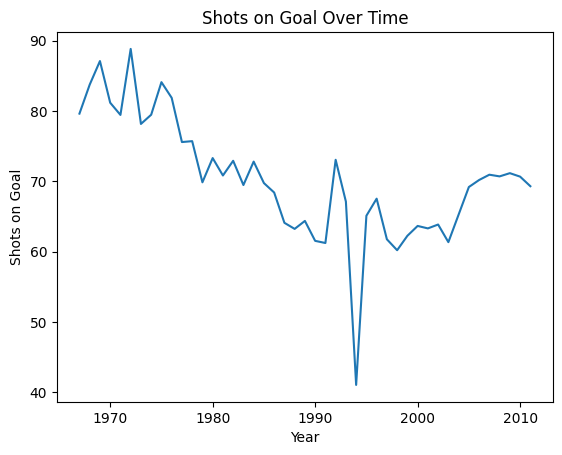

In [40]:
plt.plot(per_team_df.index, per_team_df['SOG'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shots on Goal')
plt.title('Shots on Goal Over Time')
plt.show()


In [41]:
filtered_years =clean_data[(clean_data.index >= 1980)]
filtered_years


,playerID,tmID,GP,G,A,Pts,SOG
year,,,,,,,
1997,aaltoan01,ANA,3.0,0.0,0.0,0.0,1.0
1998,aaltoan01,ANA,73.0,3.0,5.0,8.0,61.0
1999,aaltoan01,ANA,63.0,7.0,11.0,18.0,102.0
2000,aaltoan01,ANA,12.0,1.0,1.0,2.0,18.0
2007,abdelju01,DET,2.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...
2002,zyuzian01,MIN,66.0,4.0,12.0,16.0,113.0
2003,zyuzian01,MIN,65.0,8.0,13.0,21.0,104.0
2005,zyuzian01,MIN,57.0,7.0,11.0,18.0,80.0


In [44]:
#get data types for all cols
filtered_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28616 entries, 1997 to 2007
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  28616 non-null  object 
 1   tmID      28616 non-null  object 
 2   GP        28508 non-null  float64
 3   G         28508 non-null  float64
 4   A         28508 non-null  float64
 5   Pts       28508 non-null  float64
 6   SOG       28508 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.7+ MB


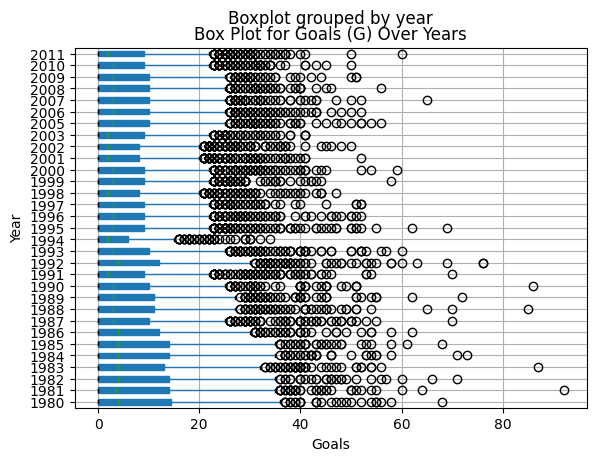

In [42]:
filtered_years.boxplot(column='G', by='year', vert=False, patch_artist=True)

plt.title('Box Plot for Goals (G) Over Years')
plt.xlabel('Goals')
plt.ylabel('Year')
plt.show()


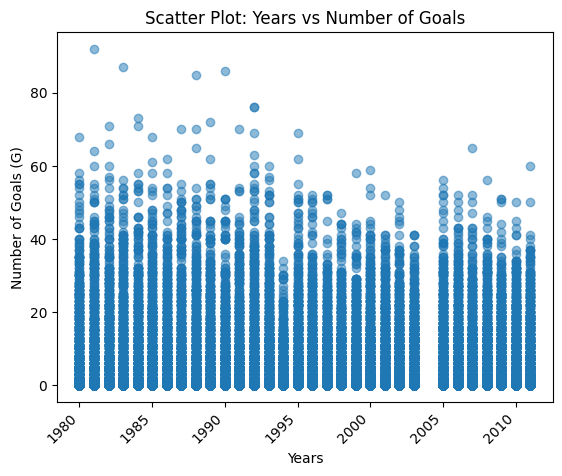

In [47]:
plt.scatter(filtered_years.index, filtered_years['G'], alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Number of Goals (G)')
plt.title('Scatter Plot: Years vs Number of Goals')
plt.xticks(rotation=45, ha='right')
plt.show()
